In [ ]:
from pathlib import Path
from zipfile import ZipFile
import requests

URL="https://www.kaggle.com/api/v1/datasets/download/yasserh/titanic-dataset"
TITANIC_ZIP = "titanic.zip"
titanic_path = Path(TITANIC_ZIP)
if not titanic_path.exists():
    data = requests.get(URL)
    with open(TITANIC_ZIP,"wb") as f:
        f.write(data.content)
    with open(TITANIC_ZIP, 'rb') as f:
        ZipFile(f).extractall()
    print('Bestand is gedownload en uitgepakt')
else:
    print('Bestand bestaat al')




## Lees de data

In [2]:
import pandas as pd
TITANIC_CSV = "Titanic-Dataset.csv"
df = pd.read_csv(TITANIC_CSV)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Filter de kolommen
We zijn alleen geïnteresseerd in Survived, Sex, Pclass en Age

In [3]:
df = df[['Survived', 'Sex', 'Pclass', 'Age']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Pclass    891 non-null    int64  
 3   Age       714 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


## Sex is een category

In [4]:
df['Sex'] = df.Sex.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Sex       891 non-null    category
 2   Pclass    891 non-null    int64   
 3   Age       714 non-null    float64 
dtypes: category(1), float64(1), int64(2)
memory usage: 22.0 KB


## Survived is een boolean

In [5]:
df['Survived'] = df.Survived.astype(pd.BooleanDtype())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    boolean 
 1   Sex       891 non-null    category
 2   Pclass    891 non-null    int64   
 3   Age       714 non-null    float64 
dtypes: boolean(1), category(1), float64(1), int64(1)
memory usage: 16.8 KB


## Alleen bekende leeftijden overhouden
(aangezien we niets met lijftijden doen, best niet droppen, want dan verliezen we nuttige info van geslacht en klasses)

In [ ]:
#df = df.dropna()
#df.info()

## Bereken de aantallen overlevenden/niet-overlevenden per klasse

In [6]:
per_Pclass = df.groupby(['Pclass', 'Survived']).size().unstack() # zet Pclass als index
per_Pclass

Survived,False,True
Pclass,,
1,80,136
2,97,87
3,372,119


## Bereken de percentages

In [7]:
display(per_Pclass.sum(axis=1)) # som per rij

Pclass
1    216
2    184
3    491
dtype: int64

In [8]:
percentages = per_Pclass.div(per_Pclass.sum(axis=1), axis=0) * 100 # div = division van elk element in Pclass door de som in die rij
percentages

Survived,False,True
Pclass,,
1,37.037037,62.962963
2,52.717391,47.282609
3,75.763747,24.236253


## Plot de overlevingskans per klasse

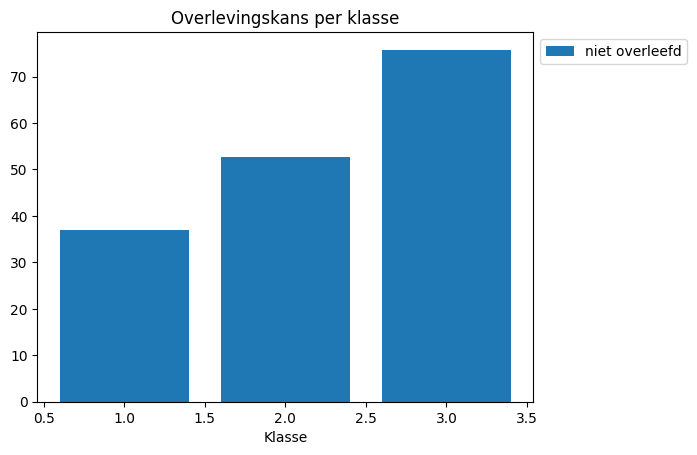

In [9]:
import matplotlib.pyplot as plt

# eerst drie bottom bars van niet overleefd:

bar = plt.bar(percentages.index, percentages.iloc[:, 0], label='niet overleefd')
# iloc[:, 0] is de eerste kolom (False) van alle rijen
# alt: percentages.loc[:, False] (zonder ''!!!)

#bar = plt.bar(percentages.index, percentages.iloc[:, 1], bottom=percentages.iloc[:, 0], label='wel overleefd')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1)) # (0,0) is links beneden, (1, 1) is rechts boven
plt.xlabel('Klasse')
plt.title('Overlevingskans per klasse')
plt.show()

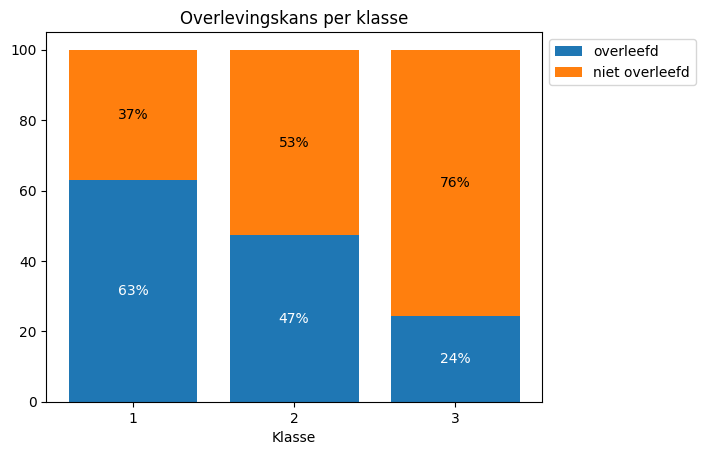

In [10]:
# misschien best omkeren: overleefd vanonder zetten

bar = plt.bar(percentages.index, percentages.iloc[:, 1], label='overleefd')
plt.gca().bar_label(bar, fmt='{:,.0f}%', label_type='center', color='white')
bar = plt.bar(percentages.index, percentages.iloc[:, 0], bottom=percentages.iloc[:, 1], label='niet overleefd')
plt.gca().bar_label(bar, fmt='{:,.0f}%', label_type='center')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Klasse')
plt.title('Overlevingskans per klasse')
plt.xticks(per_Pclass.index)
plt.show()

# Verdeling overleefd per klasse en per geslacht
Maak de onderstaande grafiek. Je mag de hulp inroepen van ChatGPT. Maar beschrijf zelf in markdown cellen wat elke stap doet (vraag geen bijkomende uitleg aan ChatGPT). Dat wil zeggen dat je de documentatie zult moeten opzoeken voor elke functie die ChatGPT gebruikt en die je niet kent.

1. Group the data by Pclass, Sex, and Survived: Use groupby(['Pclass', 'Sex', 'Survived']) to count occurrences of each combination. This gives raw counts of survived/not survived for each sex within each class.

2. Unstack the Survived column: Apply .size().unstack('Survived') to pivot the 'Survived' values (False/True) into columns. This results in a DataFrame with multi-index rows (Pclass, Sex) and columns for False (not survived) and True (survived) counts.

In [ ]:
df_survived = df.groupby(['Pclass', 'Sex', 'Survived']).size().unstack('Survived')
df_survived.head()

C:\Users\Jef\AppData\Local\Temp\ipykernel_12376\3077052816.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_survived = df.groupby(['Pclass', 'Sex', 'Survived']).size().unstack()


Survived       False  True 
Pclass Sex                 
1      female      3     91
       male       77     45
2      female      6     70
       male       91     17
3      female     72     72

3. Calculate percentages: For each row (i.e., per Pclass and Sex), compute the percentage by dividing each count by the row sum and multiplying by 100. Use .div(df.sum(axis=1), axis=0) * 100 on the unstacked DataFrame. This gives percentages for not survived and survived within each sex-class group.

In [19]:
survival_percentages = df_survived.div(df_survived.sum(axis=1), axis=0) * 100
survival_percentages.head()

Survived           False      True 
Pclass Sex                         
1      female   3.191489  96.808511
       male    63.114754  36.885246
2      female   7.894737  92.105263
       male    84.259259  15.740741
3      female  50.000000  50.000000

4. These percentages can then be used directly in Matplotlib's plt.bar() with appropriate positioning for side-by-side bars (e.g., using offsets for male/female per class) and stacking (e.g., bottom parameter for the second stack). If Age filtering is needed, drop NaNs first, but the notebook notes suggest keeping them for other info.

In [24]:
survival_percentages

Survived           False      True 
Pclass Sex                         
1      female   3.191489  96.808511
       male    63.114754  36.885246
2      female   7.894737  92.105263
       male    84.259259  15.740741
3      female  50.000000  50.000000
       male    86.455331  13.544669

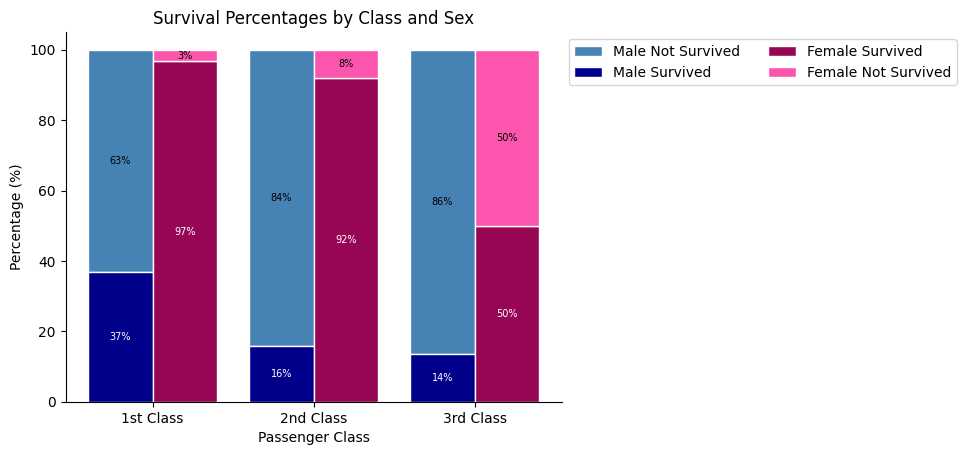

In [25]:
import matplotlib.pyplot as plt

# Define colors
male_survived = 'darkblue'
male_not = 'steelblue'
female_survived = '#970555'
female_not = "#FC55AE"

# Positions for Pclass (1, 2, 3)
positions = [1, 2, 3]
width = 0.4

# Create the plot
fig, ax = plt.subplots()

# Loop over each Pclass
for i, pclass in enumerate([1, 2, 3]):
    pos = positions[i]
    
    # Get data for male and female
    male_data = survival_percentages.loc[(pclass, 'male')]
    female_data = survival_percentages.loc[(pclass, 'female')]
    
    # Plot male bars (survived at bottom)

    bar_male_not = ax.bar(pos - 0.2, male_data[False], bottom=male_data[True], color=male_not, width=width, label='Male Not Survived' if i == 0 else "", edgecolor='white', linewidth=1)
    ax.bar_label(bar_male_not, fmt='{:,.0f}%', label_type='center', fontsize=7)
    bar_male_survived = ax.bar(pos - 0.2, male_data[True], color=male_survived, width=width, label='Male Survived' if i == 0 else "", edgecolor='white', linewidth=1)
    ax.bar_label(bar_male_survived, fmt='{:,.0f}%', label_type='center', color='white', fontsize=7)
    # Plot female bars (survived at bottom)
    bar_female_survived = ax.bar(pos + 0.2, female_data[True], color=female_survived, width=width, label='Female Survived' if i == 0 else "", edgecolor='white', linewidth=1)
    ax.bar_label(bar_female_survived, fmt='{:,.0f}%', label_type='center', color='white', fontsize=7)
    bar_female_not = ax.bar(pos + 0.2, female_data[False], bottom=female_data[True], color=female_not, width=width, label='Female Not Survived' if i == 0 else "", edgecolor='white', linewidth=1)
    ax.bar_label(bar_female_not, fmt='{:,.0f}%', label_type='center', fontsize=7)


# Customize the plot
ax.set_xticks(positions, ['1st Class', '2nd Class', '3rd Class'])
#ax.set_xticklabels()
ax.set_xlabel('Passenger Class')
ax.set_ylabel('Percentage (%)')
ax.set_title('Survival Percentages by Class and Sex')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), ncols=2)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

**Explanation of if i == 0 else "" in ax.bar():**
This expression (Python ternary operator) conditionally that sets the label parameter for ax.bar() calls is especially useful in stacked bar plots. It evaluates to an empty string ("") for all bars except the first one (when i == 0), which helps avoid duplicate legend entries in stacked charts.

**Explanation of pos - 0.2 in ax.bar()**
This expression adjusts the x-coordinate of the bars in ax.bar() to create side-by-side positioning, commonly used for grouped or comparative bar plots.
- Purpose: In matplotlib's bar() method, the first argument (x) sets the horizontal position of each bar. Subtracting 0.2 from pos (a base position, e.g., 1, 2, 3 for categories) shifts the bar leftward, enabling side-by-side bars (e.g., for male/female groups per class) without overlap.
- Context in Grouped Bars: For stacked or grouped bars, offsets like this ensure bars are visually separated while aligning with category ticks.

**edgecolor parameter**
Makes a nicer visual separation between the different parts of the stacked bars.

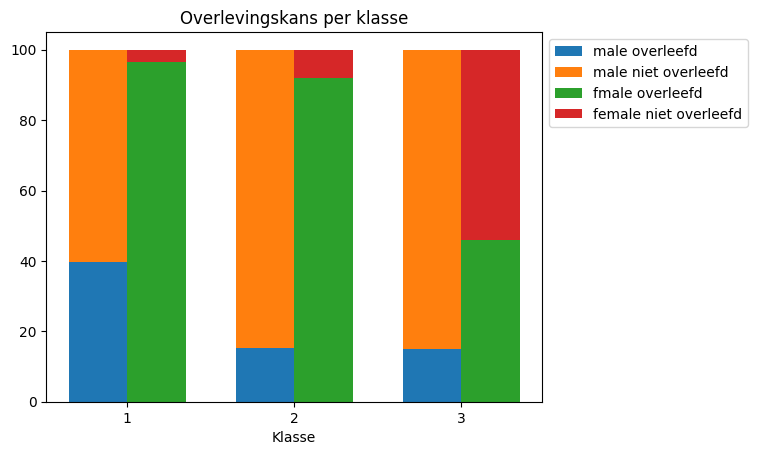